### Predicting the Sale Price of Bulldozers using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import the training and validation sets
df = pd.read_csv("TrainAndValid.csv",low_memory=False)
# low_memory = False showing we have excess memory no need to show warning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# checking for null value
df.isna().sum() # isna is used for null value

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

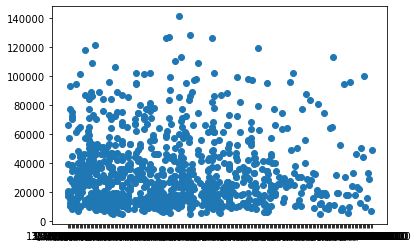

In [5]:
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

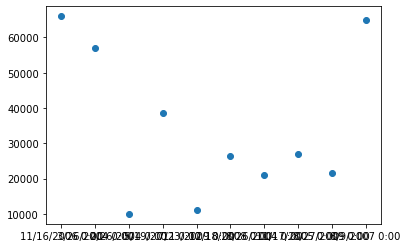

In [7]:
# As it is too much so lets try something else
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:10],df["SalePrice"][:10])

<AxesSubplot:ylabel='Frequency'>

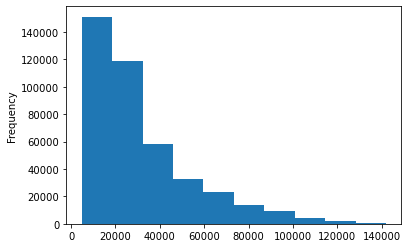

In [8]:
# so lets try same thing on histogram
df.SalePrice.plot.hist()

## Parsing Dates

When we work with time series data, we want to enrich the time & date component as much as possible

We can do that by telling pandas which of our columns has dates in it using `parse_dates` parameter.

In [9]:
df.saledate.dtype

dtype('O')

In [10]:
# as its data type as in object so we will convert or change into date and time object with help of "parse_dates"

# Import data again but this time parse dates
df = pd.read_csv("TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

df.saledate.dtype

# Now it converted to date and time object

dtype('<M8[ns]')

In [11]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

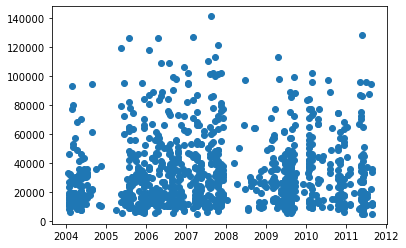

In [12]:
fig, ax=plt.subplots()

ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

# as now because of saledate in datetime object we can clearly sees in x axis

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# to see in different way we can transpose it also
df.head(6).T

,0,1,2,3,4,5
SalesID,1139246,1139248,1139249,1139251,1139253,1139255
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0
MachineID,999089,117657,434808,1026470,1057373,1001274
ModelID,3157,77,7009,332,17311,4605
datasource,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0
UsageBand,Low,Low,High,High,Medium,Low
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00


# Sort DataFrame by saledate

###### When working with time series data, it's good idea to sort it by date.

In [15]:
# sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
df.head() # Now you can see our dataframe is order by Dates

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Make a copy of the original DataFrame

we make a copy of original dataframe so when we manipulate the copy, we have still got our original data

In [17]:
# Make a copy
df_tmp = df.copy()

In [18]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


# Add datetime parameters for `saledate` column

In [19]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year # df_tmp is dataframe, saledate is column inside df, dt is datetime to acess date and time and year is called
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [20]:
df_tmp[:10].saledate.dt.day

205615    17
274835    31
141296    31
212552    31
62755     31
54653     31
81383     31
204924    31
135376    31
113390    31
Name: saledate, dtype: int64

In [21]:
df_tmp[:10].saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
54653     1989
81383     1989
204924    1989
135376    1989
113390    1989
Name: saledate, dtype: int64

In [22]:
df_tmp[:10].saledate.dt.month

205615    1
274835    1
141296    1
212552    1
62755     1
54653     1
81383     1
204924    1
135376    1
113390    1
Name: saledate, dtype: int64

In [23]:
df_tmp[:10].saledate.dt.month

205615    1
274835    1
141296    1
212552    1
62755     1
54653     1
81383     1
204924    1
135376    1
113390    1
Name: saledate, dtype: int64

In [24]:
# Now we enriched our dataframe with date time feature we can remove saledate
df_tmp.drop("saledate",inplace=True,axis=1)

In [25]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [26]:
# check the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Modelling



### To model it-
#### First we need to convert all datatype into int from object
#### Then need to drop or fill all empy values

In [27]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [29]:
# # we can fill the empty value with mean also
# df_tmp["auctioneerID "]=df_tmp["auctioneerID"].fillna(df_tmp["auctioneerID"].mean(),inplace=True)
# df_tmp.isna().sum()

### Convert strings to categories

One way we can turn all of our data into numbers is by converting them into pandas categories

we have man also different ways but here we are trying something new

In [30]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [31]:
# Find the column which contain strings
for label, content in df_tmp.items():  #label is column name
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [32]:
# If you're wondering what df.items() does,here's an example

random_dict = {"key1":"hello",
               "key2":"world!"}

for key,value in random_dict.items():
    print(f"this is key:{key}",
    print(f"this is value:{value}"))

this is value:hello
this is key:key1 None
this is value:world!
this is key:key2 None


### Now convert string value into categoty value

see in when we convert it into category, it will show us the string but pandas will treat it up as integer so you dont need to woory

In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [34]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [35]:
# lets check the category any label

df_tmp.state.cat.categories  # as ordered above means it order either by alphabetical order or order by value counts

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [36]:
# See these are integers even we see it as string to see their int do this code
df_tmp.state.cat.codes # cat means categories see it used to acces categories codes
# all states assigned some integer and its now numeric in machine eyes now

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [37]:
# Now lets check for missing data

# check in front of lenght percentage

df_tmp.isna().sum()/len(df_tmp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save preprocessed data into csv

In [38]:
# export current tmp dataframe
df_tmp.to_csv("train_tmp.csv",index=False)

### Fill missing values


#### Fill the numerical value

In [39]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [40]:
# Check for which numeric column have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # to check whether it contains null values or not
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [41]:
# Fill numeric rows with the median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content) # if true proceed to fill with median otherwise show false
            
            # we have add label + missing column to show that yes if this value is true here we filled it with the median value
            
            # Fill the missing numerical values with median
            df_tmp[label] = content.fillna(content.median())
            # Here use the median as median is more proficient and practical than mean as we have more thank 450k+ data

In [42]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [43]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample has missing value or not
        df_tmp[label+"missing_data"] = pd.isnull(content)
        # Turn categories into number and add +1
        
        # Now you are thinking why to add +1
        #see when we convert string to categories sometime pandas assign -1 value to some labels so toavoid it we add +1 atleast we dont want negative we want value equal to zero or greater than it
        df_tmp[label] = pd.Categorical(content).codes + 1 

In [44]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
                                ..
Backhoe_Mountingmissing_data     0
Blade_Typemissing_data           0
Travel_Controlsmissing_data      0
Differential_Typemissing_data    0
Steering_Controlsmissing_data    0
Length: 103, dtype: int64

In [45]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingmissing_data,False,True,False,True,False
Blade_Typemissing_data,False,True,False,True,False
Travel_Controlsmissing_data,False,True,False,True,False
Differential_Typemissing_data,True,False,True,False,True


Now all of data is numeric as well as we dont have any numerical value , we should be able to build a machine learning model

In [46]:
%%time 
# to tell how much time it will take to execute the process
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1, # here we set value -1 as dataset is large here -1 indicate we r going to use all the core of computer
                             random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

CPU times: total: 18min 7s
Wall time: 1min 1s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
# Score the model
model.score(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Question** Why doesnt our metrics is reliable?

its because training and testing data is same thats why accuracy is so high so we split the data

## Splitting into train/valid


as we have ordered the dataset with saleyear and we know our valid data set start after year 2011 i.e 2012 only(read in data dictionary)

In [48]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [49]:
# as we have 11573 valid data set in 2012 year

# split the data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear < 2012]

len(df_val), len(df_train)

(11573, 401125)

In [50]:
# Split the data into x and y
x_train , y_train = df_train.drop("SalePrice",axis=1), df_train["SalePrice"]
x_valid , y_valid =  df_val.drop("SalePrice",axis=1), df_val["SalePrice"]

x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [51]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthmissing_data,Stick_Lengthmissing_data,Thumbmissing_data,Pattern_Changermissing_data,Grouser_Typemissing_data,Backhoe_Mountingmissing_data,Blade_Typemissing_data,Travel_Controlsmissing_data,Differential_Typemissing_data,Steering_Controlsmissing_data
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


## Build Evaluation Function

In [52]:
# Create evaluation function (here we are going to use RMLSE ROOT MEANS SQUARED LOG ERROR)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
    
# Create function to evaluate model on few different levels

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid) # if our validation score comes more than training score, it means model is overfitting
    scores ={"Training MAE":mean_absolute_error(y_train, train_preds),
            "Validation MAE":mean_absolute_error(y_valid, val_preds),
            "Training RMSLE":rmsle(y_train, train_preds),
            "Validation RMSLE":rmsle(y_valid, val_preds),
            "Training R^2":r2_score(y_train, train_preds),
            "Valid R^2":r2_score(y_valid,val_preds)}
    return scores

# Testing our model on a subset (to tune the hyperparameters)

In [53]:
# Change the max_sample values

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [54]:
%%time

# cutting down on the max number of samples each estimators can see the improve

# we do this so we can do experimentation and it doesnt take large time if our accuracy is good we can finally implement on large dataset
model.fit(x_train,y_train)

CPU times: total: 34.9 s
Wall time: 3.67 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [55]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparamter tuning with RandomizedSearchCV

In [56]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparamteres
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
           "max_samples":[10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=5, # keep it low for experimentation as 100 it will take more time but better result so for the final result put 100
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 58.2 s
Wall time: 1min 1s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [57]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [58]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6856.9971220967,
 'Validation MAE': 8162.3028452277185,
 'Training RMSLE': 0.30648082686172456,
 'Validation RMSLE': 0.32761790342888875,
 'Training R^2': 0.7946777512376779,
 'Valid R^2': 0.7852247935209237}

In [59]:
# the score is not good is as it iter for only 5 times so we will iter it for 100 but it will take time nearly 1 hour 

## Training a model with the best parameters

**Note:** These were found after 100 iteration of `RandomizedSearchCV`

In [60]:
%%time

# Most ideal hyperparameter
rs_model_100 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2, # keep it low for experimentation as 100 it will take more time but better result so for the final result put 100
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model_100.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 16.8 s
Wall time: 20.3 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
%%time

# Most ideal hyperparamter
ideal_model = RandomForestRegressor(n_estimators=1,
                                    min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model.fit(x_train,y_train)

CPU times: total: 3.09 s
Wall time: 3.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=1,
                      n_jobs=-1, random_state=42)

In [62]:
# model run on full dataset
show_scores(ideal_model)

{'Training MAE': 4166.868873673299,
 'Validation MAE': 8152.674932430778,
 'Training RMSLE': 0.2085381615756673,
 'Validation RMSLE': 0.3356986512276482,
 'Training R^2': 0.9039064250706661,
 'Valid R^2': 0.7709365148849873}

In [63]:
# model with only 10k data
show_scores(rs_model)

{'Training MAE': 6856.9971220967,
 'Validation MAE': 8162.302845227718,
 'Training RMSLE': 0.30648082686172456,
 'Validation RMSLE': 0.32761790342888875,
 'Training R^2': 0.7946777512376779,
 'Valid R^2': 0.7852247935209237}

# Making Prediction on Test data


In [74]:
df_test = pd.read_csv("Test.csv",low_memory=False,
                     parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [75]:
def preprocess_data(df):
    '''Preprocess data'''
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    # Performs transformations on df and returns transformed df
    
    df["saleIsMonthStart"] = df.saledate.dt.is_month_start
    df["saleIsMonthEnd"] = df.saledate.dt.is_month_end
    df["saleQuarter"] = df.saledate.dt.quarter
    df["saleIsQuarterStart"] = df.saledate.dt.is_quarter_start
    df["saleIsQuarterEnd"] = df.saledate.dt.is_quarter_end
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    print("Created new dates")
    # Fill the numeric rows with median
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                
            # Filled categorical missing data and turn categories into numers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # we add +1 to the category code because pandas endoes missing categories
            df[label] = pd.Categorical(content).codes
        # Check if there's any null numeric values
    for label, content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(label)
    
    return df

In [76]:
preprocess_data(df_test)

Created new dates


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,1,498,179,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,0,830,291,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,2,1176,403,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,0,286,112,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,1,565,195,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,-1,712,234,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,-1,185,79,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,-1,324,122,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,-1,324,122,...,False,False,False,False,False,True,True,True,True,True


In [67]:
# # This will turn all of the string value into category values
# for label, content in df_test.items():
#     if pd.api.types.is_string_dtype(content):
#         df_test[label] = content.astype("category").cat.as_ordered()



In [68]:
# for label, content in df_test.items():
#     if pd.api.types.is_numeric_dtype(content):
#         print(label)


SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [77]:
test_preds = ideal_model.predict(df_test)


C:\Users\Amit\Desktop\sample\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingmissing_data
- Blade_Extensionmissing_data
- Blade_Typemissing_data
- Blade_Widthmissing_data
- Coupler_Systemmissing_data
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 106 features, but RandomForestRegressor is expecting 102 features as input.

In [78]:
# We can find how the columns differ using sets
set(x_train.columns) - set(df_test.columns)

{'Backhoe_Mountingmissing_data',
 'Blade_Extensionmissing_data',
 'Blade_Typemissing_data',
 'Blade_Widthmissing_data',
 'Coupler_Systemmissing_data',
 'Couplermissing_data',
 'Differential_Typemissing_data',
 'Drive_Systemmissing_data',
 'Enclosure_Typemissing_data',
 'Enclosuremissing_data',
 'Engine_Horsepowermissing_data',
 'Forksmissing_data',
 'Grouser_Tracksmissing_data',
 'Grouser_Typemissing_data',
 'Hydraulics_Flowmissing_data',
 'Hydraulicsmissing_data',
 'Pad_Typemissing_data',
 'Pattern_Changermissing_data',
 'ProductGroupDescmissing_data',
 'ProductGroupmissing_data',
 'ProductSizemissing_data',
 'Pushblockmissing_data',
 'Ride_Controlmissing_data',
 'Rippermissing_data',
 'Scarifiermissing_data',
 'Steering_Controlsmissing_data',
 'Stick_Lengthmissing_data',
 'Stickmissing_data',
 'Thumbmissing_data',
 'Tip_Controlmissing_data',
 'Tire_Sizemissing_data',
 'Track_Typemissing_data',
 'Transmissionmissing_data',
 'Travel_Controlsmissing_data',
 'Turbochargedmissing_data',
 

In [ ]:
# # Manually adjust df_test to have auctioneerID_is_missing column
# df_test['Backhoe_Mountingmissing_data',
#  'Blade_Extensionmissing_data',
#  'Blade_Typemissing_data',
#  'Blade_Widthmissing_data',
#  'Coupler_Systemmissing_data',
#  'Couplermissing_data',
#  'Differential_Typemissing_data',
#  'Drive_Systemmissing_data',
#  'Enclosure_Typemissing_data',
#  'Enclosuremissing_data',
#  'Engine_Horsepowermissing_data',
#  'Forksmissing_data',
#  'Grouser_Tracksmissing_data',
#  'Grouser_Typemissing_data',
#  'Hydraulics_Flowmissing_data',
#  'Hydraulicsmissing_data',
#  'Pad_Typemissing_data',
#  'Pattern_Changermissing_data',
#  'ProductGroupDescmissing_data',
#  'ProductGroupmissing_data',
#  'ProductSizemissing_data',
#  'Pushblockmissing_data',
#  'Ride_Controlmissing_data',
#  'Rippermissing_data',
#  'Scarifiermissing_data',
#  'Steering_Controlsmissing_data',
#  'Stick_Lengthmissing_data',
#  'Stickmissing_data',
#  'Thumbmissing_data',
#  'Tip_Controlmissing_data',
#  'Tire_Sizemissing_data',
#  'Track_Typemissing_data',
#  'Transmissionmissing_data',
#  'Travel_Controlsmissing_data',
#  'Turbochargedmissing_data',
#  'Undercarriage_Pad_Widthmissing_data',
#  'UsageBandmissing_data',
#  'auctioneerID_is_missing',
#  'fiBaseModelmissing_data',
#  'fiModelDescmissing_data',
#  'fiModelDescriptormissing_data',
#  'fiModelSeriesmissing_data',
#  'fiProductClassDescmissing_data',
#  'fiSecondaryDescmissing_data',
#  'statemissing_data'] = False
# df_test.head()

In [ ]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)
test_preds

In [ ]:
# lets format the prediction
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

In [ ]:
# Export the prediction
df_preds.to_csv("test_prediction_results.csv",index=False)

# Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [ ]:
# Find feature importance of our best model
ideal_model.feature_importances_

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

In [ ]:
plot_features(x_train.columns, ideal_model.feature_importances_)
